In [35]:
import numpy as np
import sys
#sys.path.append('../utils/')
from utils import check_stochastic_matrix
import matplotlib.pyplot as plt
import copy

# Discrete Time Markov Chains
This is an exercise notebook on DTMCs. 

Remember to revise of the lecture on DTMC before attempting to solve it! 

#### Models

Consider few DTMCs, those seen in the lectures and few more:

1. Weather forecasting: the weather tomorrow is dependent on today’s weather. If today is rainy, half of the
times tomorrow will also be rainy; 40% will be cloudy; 10% will be sunny. If today is
cloudy, 20% of the times tomorrow will be rainy; 40% will be cloudy; 40% will be
sunny. If today is sunny, 10% of the times tomorrow will be rainy; 20% will be cloudy;
70% will be sunny. Can this be modeled as a DTMC? If the answer is yes, define the transition matrix as `transition_weather`.

In [2]:
#definition for a matrix to be a stochastic matrix
#every element positive
#rows sums to one
#dimension = state space squared

# Order of states: Rainy, Cloudy, Sunny
transition_weather = np.array([[0.5, 0.4, 0.1], [0.2, 0.4, 0.4], [0.1, 0.2, 0.7]])
transition_weather

weather={"sun":0,"cloud":1,"rain":2}
print("Sun transition probabilites: ",transition_weather[weather["sun"]])
print("\nCheck stochasticity: ",check_stochastic_matrix(transition_weather) )

Sun transition probabilites:  [0.5 0.4 0.1]

Check stochasticity:  True


2. The die simulator, `transition_die`. Define it. It has 13 states. Give also names to states and use a dictionary to match names with indexes in the matrix. 

![alt text](images/die.png)

In [3]:
def build_transition_die():
    k = {'s' + str(key): val for (key, val) in zip(range(13), range(13))}
    transition_die = np.zeros((13, 13))
    
    def set_val(state_a, state_b, val=0.5):
        transition_die[k[state_a]][k[state_b]] = val

    set_val('s0', 's1')
    set_val('s0', 's2')
    set_val('s1', 's3')
    set_val('s1', 's4')
    set_val('s2', 's5')
    set_val('s2', 's6')
    set_val('s3', 's1')
    set_val('s3', 's7')
    set_val('s4', 's8')
    set_val('s4', 's9')
    set_val('s5', 's10')
    set_val('s5', 's11')
    set_val('s6', 's2')
    set_val('s6', 's12')

    set_val('s7', 's7', 1)
    set_val('s8', 's8', 1)
    set_val('s9', 's9', 1)
    set_val('s10', 's10', 1)
    set_val('s11', 's11', 1)
    set_val('s12', 's12', 1)
    
    return transition_die

In [4]:
%%time
transition_die = build_transition_die()

print(transition_die)
print("\nCheck Stochasticity: ",check_stochastic_matrix(transition_die),"\n")

[[0.  0.5 0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.  0.  0.  0.  0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.5 0. ]
 [0.  0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. ]]

Check Stochasticity:  True 

CPU times: user 4.97 ms, sys: 149 µs, total: 5.12 ms
Wall time: 5.69 ms


3. A general birth-death chain, `transition_birth_death()`. Define it writing a function that takes `N` as input (the maximum population size) and vectors `p` (the birth probability) and `q` (the death probability) of length N and returns the transition matrix `transition_birth_death`.

![alt text](images/birth-death.png)

In [5]:
def transition_birth_death(N, p, q):
    mdiag = np.ones(N)
    mdiag[:-1] -= p
    mdiag[1:] -= q
    matrix = np.zeros((N, N))
    matrix += np.diag(p, 1)
    matrix += np.diag(mdiag)
    matrix += np.diag(q, -1)
    
    return matrix

trans_matrix = transition_birth_death(5, np.array([0.1,0.2,0.3,0.4]), np.array([0.1,0.2,0.3,0.4]))
print("\nTransition birth death:\n",trans_matrix)
print("\nCheck stochasticity: ",check_stochastic_matrix(trans_matrix) )


Transition birth death:
 [[0.9 0.1 0.  0.  0. ]
 [0.1 0.7 0.2 0.  0. ]
 [0.  0.2 0.5 0.3 0. ]
 [0.  0.  0.3 0.3 0.4]
 [0.  0.  0.  0.4 0.6]]

Check stochasticity:  True


3.1. Ehrenfest model of diffusion (second law of thermodynamics): imagine a room divided into two, with `N` molecules in total within the room. In every slot of time, a molecule is chosen uniformly and at random and moved to the opposite side. Let $X_n$ be the number of molecules on side 1 at time n.
Use the function `transition_birth_death()` to obtain the transition matrix of a Ehrenfest chain, which is an example of birth-death chain, call the transition matrix `transition_ehrenfest`.

4. The model of a queue of lenght `N`. Each state of the queue counts how many customers are waiting to be served. Two things can happen in state `i`: a new customer arrives (new state `i+1`), or a customer is served (new state `i-1`). The arrival rate is `l` and service rate in state `i` equal to `min(k,i)*mu`, where `k` is another parameter. In each state of the queue, the probability of arrival or service is proportional to the respective rate. Write a function taking `N,l,mu,k` as input and returning the `transition_queue` model as output. 

#### Transient probability
Write a function that takes a DTMC as input (both the transition matrix `transition_model` and the initial probability `prob_init_model`) and the number of steps `n`, and returns the probability `prob_model` of being in each state after `n` steps. Plot the output as an histogram. 
*Extra*: compute the transient probabilities from time 0 to time `n` and visualize this output as a 2d colormap, with one axis representing states, and the other time. 


In [6]:
class DTMC:
    def __init__(self, transition_model, init_prob_model):
        self.transition_model = transition_model
        self.init_prob_model = init_prob_model

N = 3
transition_weather = np.array([[0.5, 0.4, 0.1], [0.2, 0.4, 0.4], [0.1, 0.2, 0.7]])
prob_model = np.array([0.5, 0.2, 0.3])

# define the DTMC
weather_DTMC = DTMC(transition_weather, prob_model)
weather_map = {"sun":0,"cloud":1,"rain":2}

prob = [0.21749983 0.30442727 0.4780729 ] 
check sum = 1.0000000000000004


<BarContainer object of 3 artists>

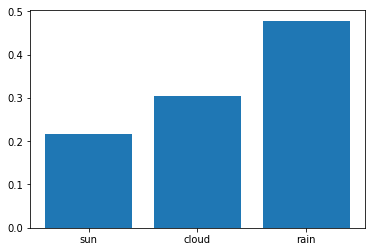

In [7]:
def compute_transient_prob(DTMC, n):
    power_matrix = np.linalg.matrix_power(DTMC.transition_model, n)
    final_prob_model = DTMC.init_prob_model.T.dot(power_matrix)
    return final_prob_model

transient_prob = compute_transient_prob(weather_DTMC, 10)
print("prob =",transient_prob, "\ncheck sum =", np.sum(transient_prob))
plt.bar(list(weather_map.keys()), height=transient_prob)


time 0 : [0.5 0.2 0.3]

time 1 : [0.32 0.34 0.34]

time 2 : [0.262 0.332 0.406]

time 3 : [0.238  0.3188 0.4432]

time 4 : [0.22708 0.31136 0.46156]

time 5 : [0.221968 0.307688 0.470344]

time 6 : [0.219556  0.3059312 0.4745128]

time 7 : [0.21841552 0.30509744 0.47648704]

time 8 : [0.21787595 0.30470259 0.47742146]

time 9 : [0.21762064 0.30451571 0.47786365]


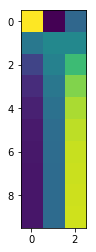

In [8]:
# 2d colormap: 
# x is the state
# y is the time 

n = 10
matrix = np.zeros([n,N])

for i in range(n):
    print("\ntime",i,":",compute_transient_prob(weather_DTMC, i))
    matrix[i]=compute_transient_prob(weather_DTMC, i)

plt.imshow(matrix)

#### Reachability (absorption probability) and hitting times.
Write a function that takes as input:
- a DTMC (the transition matrix `transition_model` is enough. Consider also defining a class describing a DTMC, containting `transition_model`, `prob_init_model`, and a map linking state numbers with names)
- a subset of states `target_region` (either specified by their name or by their indices)
The function should compute a vector `prob_absorption_model`, containing the absorption probability for each state. Use the iterative method discussed in the lecture. 

Implement also a method with the same input, returning the expected hitting times `exp_hitting_time_model`.

In [9]:
def reachability_nsteps(transition_model, target_region, n):
    
    print("\ntransition matrix:\n",transition_model)
    print("\ntarget region:\n",target_region)
    
    target_idxs = [weather_map[x] for x in target_region]
    update_idxs = list(set(range(len(transition_model)))-set(target_idxs))
    
    # set initial absorption probability for each state
    prob_absorption_model = np.zeros(len(transition_model))
    prob_absorption_model[target_idxs] = 1  
    print("\nstep 0:",prob_absorption_model)
    
    # iterative step    
    for i in range(n):
        prob_absorption_model[update_idxs] = transition_model[update_idxs].dot(prob_absorption_model.T)
        print("\nstep",i+1,":",prob_absorption_model)
        
    return prob_absorption_model

target_region = ['cloud','rain']

prob_absorption = reachability_nsteps(weather_DTMC.transition_model, target_region, 10)
print("\nfinal absorption probability for each state:\n", prob_absorption)

# aggiungere una condizione sulla tolleranza


transition matrix:
 [[0.5 0.4 0.1]
 [0.2 0.4 0.4]
 [0.1 0.2 0.7]]

target region:
 ['cloud', 'rain']

step 0: [0. 1. 1.]

step 1 : [0.5 1.  1. ]

step 2 : [0.75 1.   1.  ]

step 3 : [0.875 1.    1.   ]

step 4 : [0.9375 1.     1.    ]

step 5 : [0.96875 1.      1.     ]

step 6 : [0.984375 1.       1.      ]

step 7 : [0.9921875 1.        1.       ]

step 8 : [0.99609375 1.         1.        ]

step 9 : [0.99804688 1.         1.        ]

step 10 : [0.99902344 1.         1.        ]

final absorption probability for each state:
 [0.99902344 1.         1.        ]


In [37]:
def reachability_ths(transition_model, target_region, ths):
    """ 
    same as before, but setting a ths on vector distance 
    instead of the number of iterations.
    """
    print("\ntransition matrix:\n",transition_model)
    print("\ntarget region:\n",target_region)
    
    # idxs for the updates
    target_idxs = [weather_map[x] for x in target_region]
    update_idxs = list(set(range(len(transition_model)))-set(target_idxs))
    
    # set initial absorption probability for each state
    prob_absorption_model = np.zeros(len(transition_model))
    prob_absorption_model[target_idxs] = 1  
    print("\nstep 0:", prob_absorption_model)
    
    dist=1
    i=1
    while(dist > ths):
        old_abs_prob = copy.deepcopy(prob_absorption_model)
        
        prob_absorption_model[update_idxs] = transition_model[update_idxs].dot(prob_absorption_model.T)
        

        # update distance
        dist = np.linalg.norm(prob_absorption_model - old_abs_prob)
        print("\nstep",i,":", prob_absorption_model,"\tdist =", dist)
        i = i+1
        
    return prob_absorption_model

target_region = ['cloud','rain']

prob_absorption = reachability_ths(weather_DTMC.transition_model, target_region, 0.01)
print("\nfinal absorption probability for each state:\n", prob_absorption)


transition matrix:
 [[0.5 0.4 0.1]
 [0.2 0.4 0.4]
 [0.1 0.2 0.7]]

target region:
 ['cloud', 'rain']

step 0: [0. 1. 1.]

step 1 : [0.5 1.  1. ] 	dist = 0.5

step 2 : [0.75 1.   1.  ] 	dist = 0.25

step 3 : [0.875 1.    1.   ] 	dist = 0.125

step 4 : [0.9375 1.     1.    ] 	dist = 0.0625

step 5 : [0.96875 1.      1.     ] 	dist = 0.03125

step 6 : [0.984375 1.       1.      ] 	dist = 0.015625

step 7 : [0.9921875 1.        1.       ] 	dist = 0.0078125

final absorption probability for each state:
 [0.9921875 1.        1.       ]


#### Steady state probability

Write a function taking as input a DTMC and computes its steady state probability, assuming the chain is irreducible, aperiodic, and finite. 
*Extra*: explore Python libraries and find one implementing graph algorithms. Use a method to compute strongly connected components to check if a chain is irreducible. 

#### Model class

Implement a class having all the methods to initialize a DTMC, to compute transient behaviour, steady state behaviour, and reachability. 

#### Simulation of DTMC
Write a method that simulates a DTMC for `n` steps, where `n` is a parameter of the method, and returns the whole trajectory as output.

#### Statistical analysis
Write methods for:
- computing the average of a function `f` of the state space, at time step `n`.
- computing the probability of reaching a target region `A` of the state space by time step `n`.
Both methods should use simulation, and return an estimate and a confidence interval at a specified confidence level `alpha` (0.95% by default).

#### Branching chain
Consider a population, in which each individual at each
generation independently gives birth to $k$ individuals with
probability $p_k$. These will be the members of the next
generation. Assume $k\in\{-1, 0,1,2\}$. 

Question: under which conditions the population will become extinct?